In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import wordcloud as wc

In [47]:
path = os.path.join(os.getcwd(), "..", "param", "ap")
alpha_path = os.path.join(path, "alpha.dat")
beta_path = os.path.join(path, "phi.dat")

alpha = pd.read_table(alpha_path, sep=" ", header = None)
beta = pd.read_table(beta_path, sep=" ", header = None)

vocab_path = os.path.join(os.getcwd(), "..", "datasets", "ap", "vocab.txt" )
vocab = pd.read_table(vocab_path, header=None)

In [48]:
alpha

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [49]:
sorted_topics = alpha.transpose().sort_values(0, ascending=False).index
for topic in sorted_topics:
    top_words = beta.loc[topic].sort_values(ascending=False).index
    
    if topic < 10:
        print topic, " :" ,
    else:
        print topic , ":" , 
        
    for i in xrange(30):
        print vocab[0].loc[top_words[i]], 
    print
    print

0  : space shuttle launch nasa mission earth venus spacecraft two mars rocket magellan telescope test planet satellite astronauts program orbit discovery thursday miles scientists booster challenger oberg hubble surface engineers ground

63 : children child parents ms medical hospital women state birth mother care doctors aspirin boys childrens baby three mothers cause suffered family welfare doctor weight babies services girl group florida girls

73 : police man two home shot found night car arrested people yearold authorities city death day shooting wednesday monday taken arrest killed told three hospital officials officers woman five friday died

72 : land disney park interior acres yosemite hair person memorial program owners owned dna mickey mca root technique conrail important placed barboza confidence fcc six described disneys rural millions walt wont

71 : south north korea korean roh war games communist remains seoul koreas kim two sports first olympic visit countries peninsul

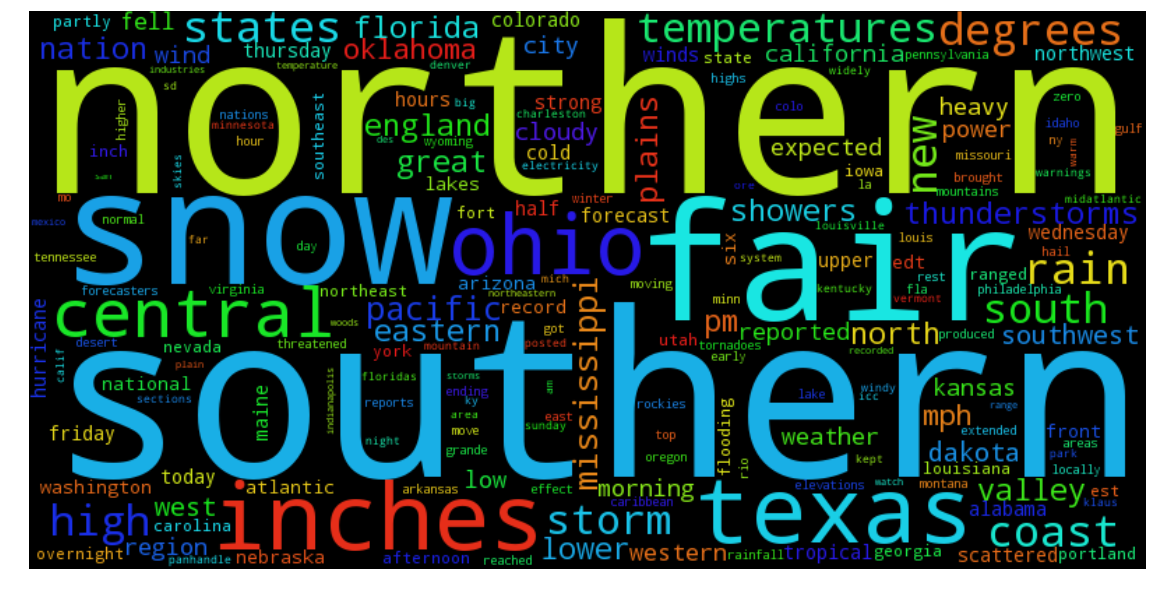

In [40]:
topic = 51
top_words = beta.loc[topic].sort_values(ascending=False).index[0:400]
word_list = []
for word_index in top_words:
    if word_index != 0:
        word_freq = (vocab[0].loc[word_index], beta.loc[topic][word_index].round(5))
        word_list.append(word_freq)
        
plt.figure(figsize=(20,10))
wordcloud = wc.WordCloud(width=800, height=400).generate_from_frequencies(word_list)
plt.imshow(wordcloud)
plt.axis("off")
# plt.savefig("topic_images/topic86.png")
plt.show()

In [6]:
sorted_topics = alpha.transpose().sort_values(0, ascending=False).index
for topic in sorted_topics:
    top_words = beta.loc[topic].sort_values(ascending=False).index[0:400]
    word_list = []
    for word_index in top_words:
        if word_index != 0:
            word_freq = (vocab[0].loc[word_index], beta.loc[topic][word_index].round(5))
            word_list.append(word_freq)
    
    if beta.loc[topic].loc[top_words[0]] - beta.loc[topic].loc[top_words[1]] > 0.01:
        image_name = vocab[0].loc[top_words[0]]
    else:
        image_name = vocab[0].loc[top_words[0]]+"_"+vocab[0].loc[top_words[1]]
        
    plt.figure(figsize=(20,10))
    wordcloud = wc.WordCloud(width=800, height=400).generate_from_frequencies(word_list)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("topic_images2/"+image_name+".png")
    plt.close()